In [11]:
import matplotlib.pyplot as plt

In [12]:
import os
import shutil
from collections import defaultdict

def count_files_in_polymnist(source_base_path):
    count_by_m_folder = defaultdict(int)
    count_by_class = defaultdict(int)

    for split in ['train', 'test']:
        split_path = os.path.join(source_base_path, split)
        print(f"\n=== {split.upper()} ===")

        for m_folder in ['m0', 'm1', 'm2', 'm3', 'm4']:
            m_path = os.path.join(split_path, m_folder)
            if not os.path.exists(m_path):
                continue

            files = [f for f in os.listdir(m_path) if f.endswith('.png')]
            count_by_m_folder[m_folder] = len(files)
            print(f"{m_folder}: {len(files)} archivos")

            for filename in files:
                label = filename.split('.')[-2]
                count_by_class[label] += 1

    return count_by_class

def count_files_in_new_folder(source_base_path):
    count_by_m_folder = defaultdict(int)
    count_by_class = defaultdict(int)

    distribution = {"train":{}, "test":{}}


    for split in ['train', 'test']:
        split_path = os.path.join(source_base_path, split)
        print(f"\n=== {split.upper()} ===")

        for m_folder in range(10):
            m_path = os.path.join(split_path, str(m_folder))
            if not os.path.exists(m_path):
                continue

            files = [f for f in os.listdir(m_path) if f.endswith('.png')]
            count_by_m_folder[m_folder] = len(files)
            print(f"{m_folder}: {len(files)} archivos")
            distribution[split][m_folder] = len(files)

            for filename in files:
                label = filename.split('.')[-2]
                count_by_class[label] += 1

    #print("\n=== RESUMEN POR CLASE ===")
    #for label in sorted(count_by_class.keys()):
    #    print(f"Clase {label}: {count_by_class[label]} imágenes")

    return count_by_class, distribution



In [13]:
# Rutas
source_base_path = 'img/PolyMNIST/MMNIST' 
target_base_path = 'img/numbers'   

# Contar archivos antes de reorganizar
print("=== CONTEO INICIAL ===")
original_count = count_files_in_polymnist(source_base_path)

=== CONTEO INICIAL ===

=== TRAIN ===
m0: 60000 archivos
m1: 60000 archivos
m2: 60000 archivos
m3: 60000 archivos
m4: 60000 archivos

=== TEST ===
m0: 10000 archivos
m1: 10000 archivos
m2: 10000 archivos
m3: 10000 archivos
m4: 10000 archivos


In [ ]:
# Verificar el resultado
# print("\n=== CONTEO EN 'numbers' ===")
new_count, distribution = count_files_in_new_folder(target_base_path)

#print(original_count)
#print()
#print(new_count)

print(distribution)



=== TRAIN ===
0: 29615 archivos
1: 33710 archivos
2: 29790 archivos
3: 30655 archivos
4: 29210 archivos
5: 27105 archivos
6: 29590 archivos
7: 31325 archivos
8: 29255 archivos
9: 29745 archivos

=== TEST ===
0: 4900 archivos
1: 5675 archivos
2: 5160 archivos
3: 5050 archivos
4: 4910 archivos
5: 4460 archivos
6: 4790 archivos
7: 5140 archivos
8: 4870 archivos
9: 5045 archivos
defaultdict(<class 'int'>, {'0': 34515, '1': 39385, '2': 34950, '3': 35705, '4': 34120, '5': 31565, '6': 34380, '7': 36465, '8': 34125, '9': 34790})

defaultdict(<class 'int'>, {'0': 34515, '1': 39385, '2': 34950, '3': 35705, '4': 34120, '5': 31565, '6': 34380, '7': 36465, '8': 34125, '9': 34790})
{'train': {0: 29615, 1: 33710, 2: 29790, 3: 30655, 4: 29210, 5: 27105, 6: 29590, 7: 31325, 8: 29255, 9: 29745}, 'test': {0: 4900, 1: 5675, 2: 5160, 3: 5050, 4: 4910, 5: 4460, 6: 4790, 7: 5140, 8: 4870, 9: 5045}}


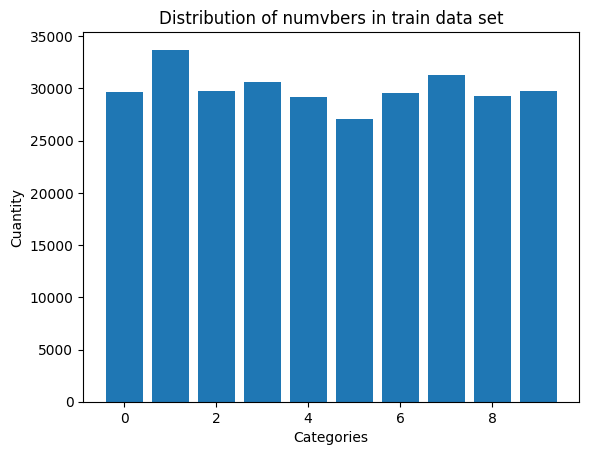

In [ ]:
train_x_values = list(distribution["train"].keys())
train_y_values_count = list(distribution["train"].values()) 

plt.bar(train_x_values, train_y_values_count)
plt.xlabel('Categories')
plt.ylabel('Cuantity')
plt.title('Distribution of numbers in train data set')
plt.show()

In [ ]:
test_x_values = list(distribution["test"].keys())
test_y_values_count = list(distribution["test"].values()) 

plt.bar(test_x_values, test_y_values_count)
plt.xlabel('Categories')
plt.ylabel('Cuantity')
plt.title('Distribution of numbers in test data set')
plt.show()